In [1]:
import os
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
os.chdir(parent_directory)
print("Working directory:", os.getcwd())

Working directory: c:\Users\benjo\OneDrive\Data Science Masters\DSMP\dsmp-2024-group-19


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tools import *

In [3]:
tape1 = read_merged_data()[0]

Opening UoB_Set01_2025-01-02tapes.csv


In [4]:
print(tape1.head())

                       Incoming bid  \
combined_time                         
2025-01-02 08:00:00           [1 6]   
2025-01-02 08:00:01         [261 1]   
2025-01-02 08:00:02         [262 6]   
2025-01-02 08:00:03  [263 6][264 6]   
2025-01-02 08:00:04                   

                                                          Incoming ask  \
combined_time                                                            
2025-01-02 08:00:00                                                      
2025-01-02 08:00:01                       [800 1][799 1][798 1][797 1]   
2025-01-02 08:00:02                                     [338 3][297 5]   
2025-01-02 08:00:03         [296 1][309 3][334 4][292 5][291 1][296 4]   
2025-01-02 08:00:04  [288 5][307 4][287 1] [296 3][287 4][300 4][28...   

                       Outgoing bid  \
combined_time                         
2025-01-02 08:00:00                   
2025-01-02 08:00:01                   
2025-01-02 08:00:02           [1 6]   
2025-01-02 0

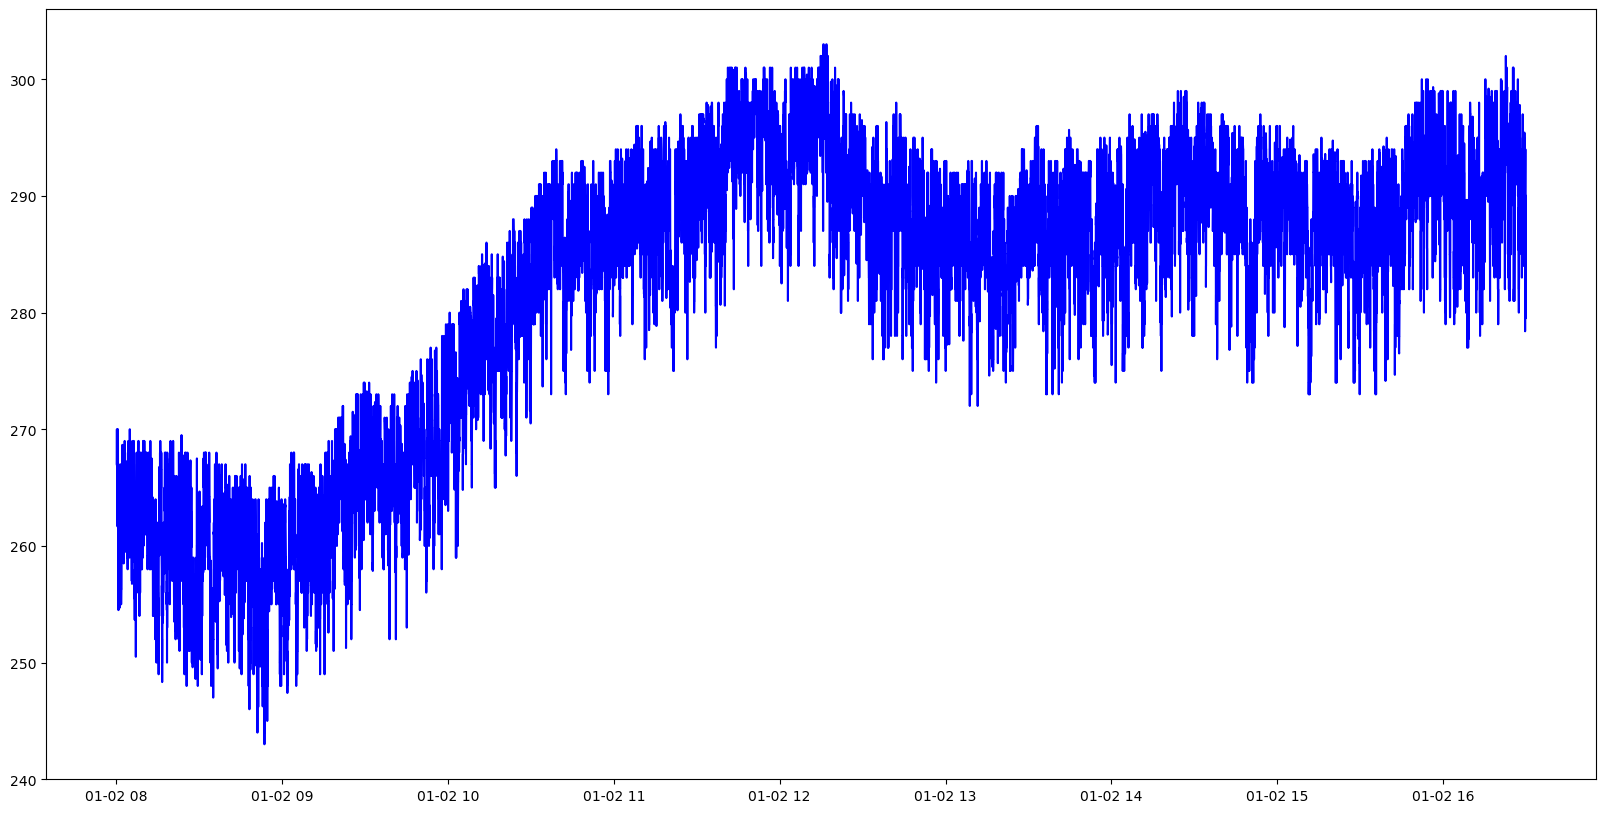

In [5]:
plt.figure(figsize=(20,10))
plt.plot(tape1['Last Tapes Price'], color='blue', label='Price')
plt.show()


In [6]:
tape1_SMAs_20 = tape1['Last Tapes Price'].rolling(window=20).mean()
tape1_SMAs_50 = tape1['Last Tapes Price'].rolling(window=50).mean()
tape1_SMAs_100 = tape1['Last Tapes Price'].rolling(window=100).mean()

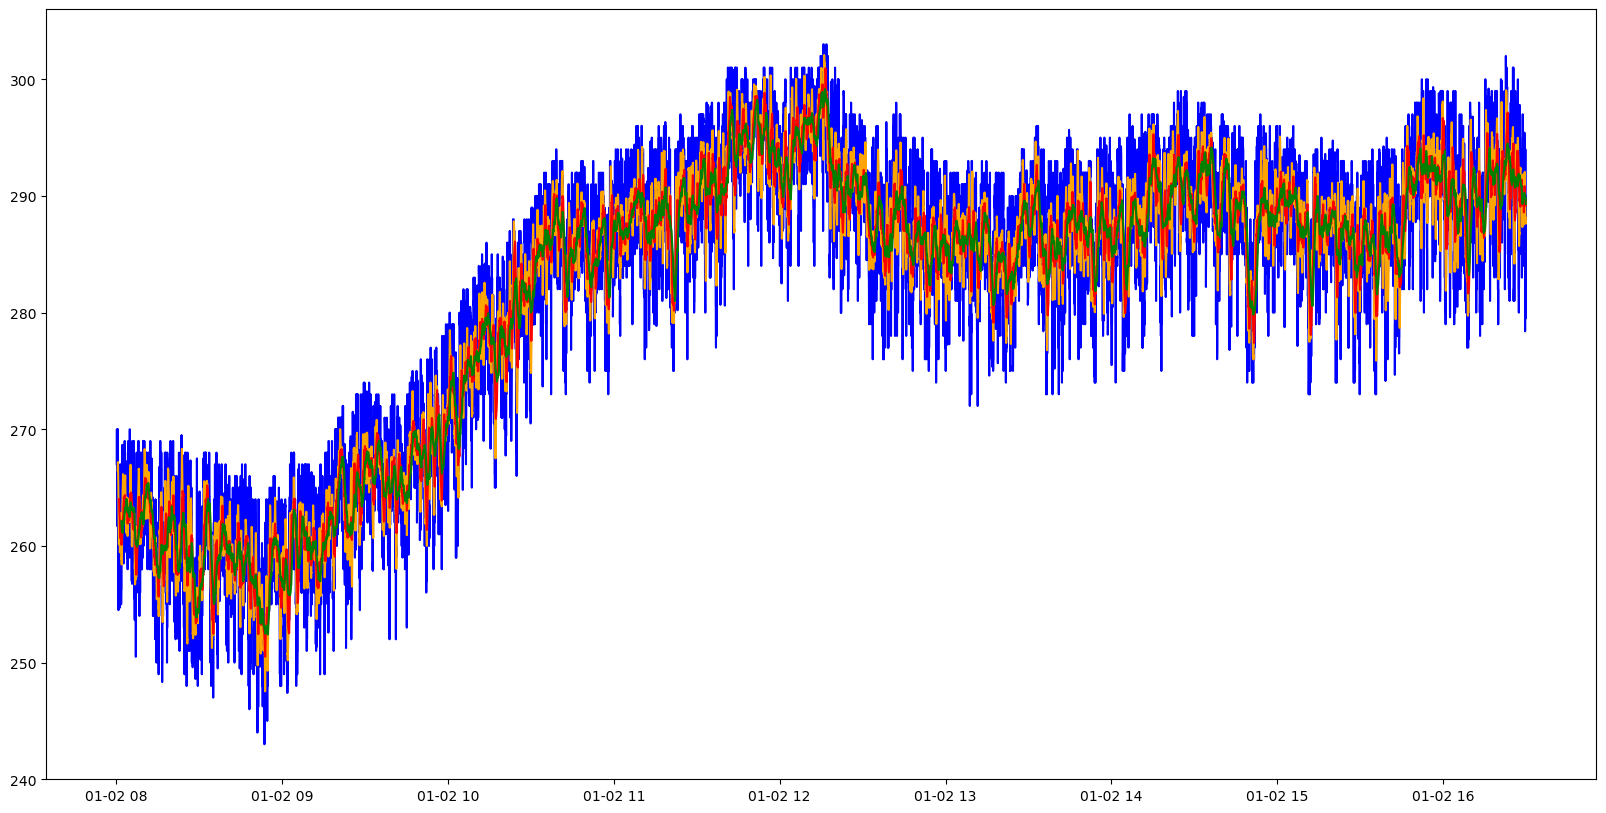

In [7]:
plt.figure(figsize=(20,10))
plt.plot(tape1.index,tape1['Last Tapes Price'],label='Price', color='blue')
plt.plot(tape1_SMAs_20, label='20-day SMA', color='orange')
plt.plot(tape1_SMAs_50, label='50-day SMA', color='red')
plt.plot(tape1_SMAs_100, label='100-day SMA', color='green')

In [19]:
# train arima model on the 50 MA data
from statsmodels.tsa.arima.model import ARIMA

# ARIMA model
model = ARIMA(tape1_SMAs_50.dropna(), order=(1,0,1))
result = model.fit()

In [25]:
raw_data_2 = read_merged_data(1)
tape2 = raw_data_2[0]
tape2 = tape2.dropna(subset=["Last Tapes Price"])
tape2_SMAs_50 = tape2['Last Tapes Price'].rolling(window=50).mean().dropna()

Opening UoB_Set01_2025-01-02tapes.csv
Opening UoB_Set01_2025-01-03tapes.csv


In [26]:
result2 = result.apply(tape2_SMAs_50)

In [27]:
print('Tape 2 Error when trained on Tape 1')
print(f'Mean Absolute Error: {result2.mae}') 
print(f'MSE: {result2.mse}')

Tape 2 Error when trained on Tape 1
Mean Absolute Error: 0.06815999957034832
MSE: 0.017562276275650327


Text(0.5, 1.0, 'ARIMA(1,0,1) Predictions for first 100 time stamps of Tape 2')

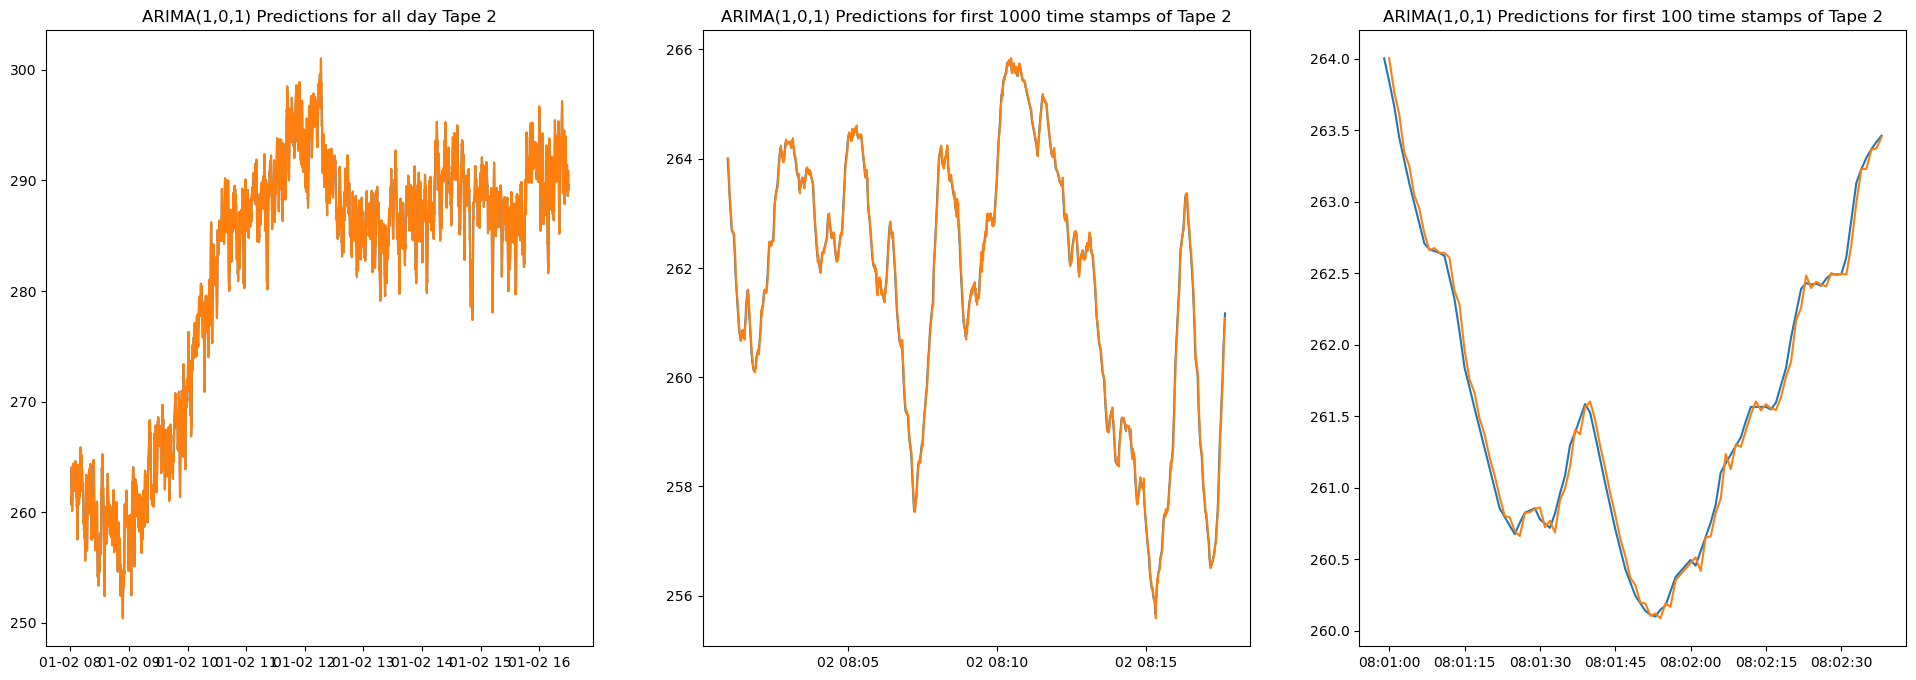

In [28]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(24,8))

pred2 = result2.predict(start=0, end=len(tape2_SMAs_50)-1)
ax1.plot(tape2_SMAs_50)
ax1.plot(pred2[1:])
ax1.set_title('ARIMA(1,0,1) Predictions for all day Tape 2')

ax2.plot(tape2_SMAs_50[:1000])
ax2.plot(pred2[1:1000])
ax2.set_title('ARIMA(1,0,1) Predictions for first 1000 time stamps of Tape 2')

ax3.plot(tape2_SMAs_50[:100])
ax3.plot(pred2[1:100]) 
ax3.set_title('ARIMA(1,0,1) Predictions for first 100 time stamps of Tape 2')

In [39]:
model = ARIMA(tape2_SMAs_50[:20000], order=(4,1,4))
result3 = model.fit()

Text(0.5, 1.0, 'ARIMA(4,1,4) Predictions for first 100 time stamps of Tape 2')

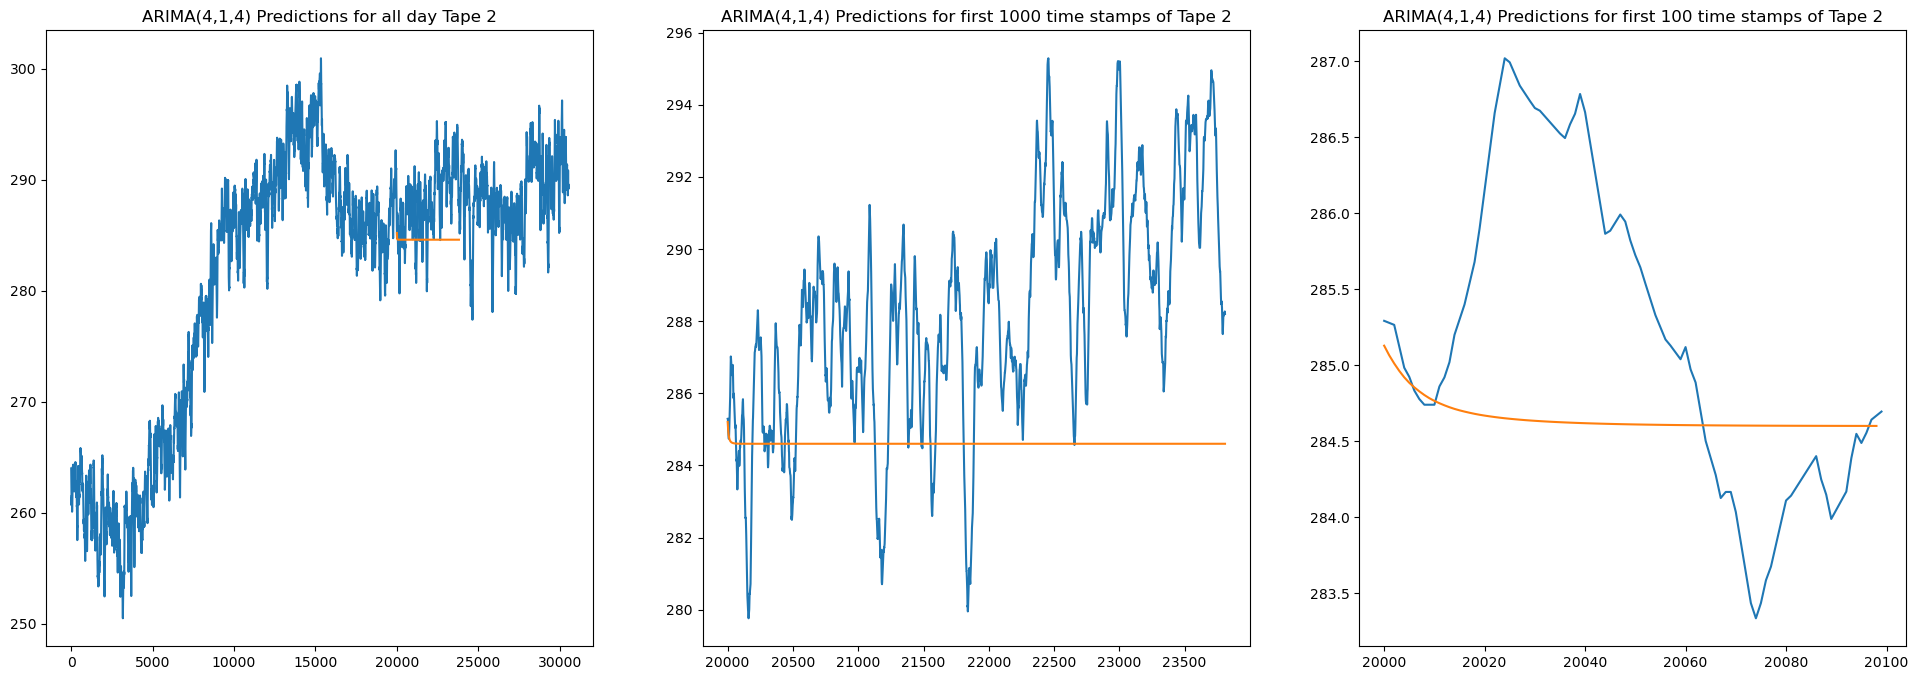

In [40]:
pred2 = result3.forecast(steps = 3810)
forecast_range = np.arange(20000,23810)
total_range = np.arange(0,30541)

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(24,8))

ax1.plot(total_range,tape2_SMAs_50)
ax1.plot(forecast_range,pred2)
ax1.set_title('ARIMA(4,1,4) Predictions for all day Tape 2')

ax2.plot(forecast_range,tape2_SMAs_50[20000:23810])
ax2.plot(forecast_range,pred2)
ax2.set_title('ARIMA(4,1,4) Predictions for first 1000 time stamps of Tape 2')

ax3.plot(np.arange(20000,20100),tape2_SMAs_50[20000:20100])
ax3.plot(forecast_range[0:99],pred2[1:100]) 
ax3.set_title('ARIMA(4,1,4) Predictions for first 100 time stamps of Tape 2')